In [1]:
import pandas as pd
import numpy as np

boundingBoxes = pd.read_csv('bounding_boxes.csv')
boundingBoxes

,Frame,TopLeftCornerX,TopLeftCornerY,Length,Height
0,1,278.5,192.5,56,38
1,2,599.5,151.5,121,130
2,3,5.5,46.5,90,87
3,5,239.5,101.5,103,21
4,6,682.5,124.5,34,26
...,...,...,...,...,...
18862,9764,131.5,251.5,170,111
18863,9764,255.5,120.5,35,39
18864,9764,282.5,82.5,31,21
18865,9766,450.5,67.5,67,53


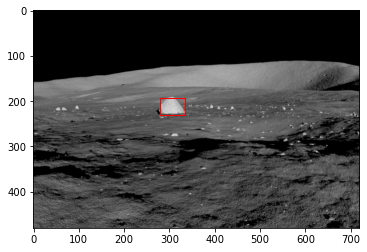

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches

#read the first image
# first = cv2.imread('./images/render/render0001.png')
first = matplotlib.image.imread('./images/render/render0001.png')

firstBox =  boundingBoxes.iloc[0, :]

topLeftX = firstBox.TopLeftCornerX
topLeftY = firstBox.TopLeftCornerY
length = firstBox.Length
height = firstBox.Height

fig, ax = plt.subplots(1)
rect = patches.Rectangle((topLeftX, topLeftY), length, height, edgecolor='r', facecolor='none')
ax.imshow(first)
ax.add_patch(rect)

In [4]:
allFrames = boundingBoxes.Frame.unique()
color = (255, 0, 0)
for frame in allFrames:
    imageName = "./images/render/render{:04d}.png".format(frame)
    image = cv2.imread(imageName)
    rectangles = boundingBoxes[boundingBoxes.Frame == frame]
    for index, row in rectangles.iterrows():
        start_point = (int(row.TopLeftCornerX), int(row.TopLeftCornerY))
        end_point = (int(row.TopLeftCornerX + row.Length), int(row.TopLeftCornerY + row.Height))
        image = cv2.rectangle(image, start_point, end_point, color, 1)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite('./images/boxes/frame{:04d}.png'.format(frame), rgb_image)

In [16]:
#attach bounding boxes to every frame
iter = len(boundingBoxes)

allFrames = boundingBoxes.

for image in range(0, iter):
    row = boundingBoxes.iloc[image, :]
    imageFrame = int(row.Frame)
    imageName = "./images/render/render{:04d}.png".format(imageFrame)
    image = cv2.imread(imageName)
    start_point = (int(row.TopLeftCornerX), int(row.TopLeftCornerY))
    end_point = (int(row.TopLeftCornerX + row.Length), int(row.TopLeftCornerY + row.Height))
    color = (255, 0, 0)
    image = cv2.rectangle(image, start_point, end_point, color, 1)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite('./images/boxes/frame{:04d}.png'.format(imageFrame), rgb_image)
    
    #showing image
#     plt.imshow(rgb_image)
#     plt.show()

#     cv2.imshow('image', image)
#     fig, ax = plt.subplots(1)
#     rect = patches.Rectangle((row.TopLeftCornerX, row.TopLeftCornerY), row.Length, row.Height, edgecolor='r', facecolor='none')
#     ax.imshow(image)
#     ax.add_patch(rect)
